In [1]:
# import all the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the dataset
df = pd.read_csv(r'iris.csv')

In [3]:
def validate_table_names(df):
    col_names = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety']
    num_cols = len(col_names)
    
    
    # Setting the flag to be true by default
    flag = True
    
    # Step 1
    # Checking if column names are correct or not. 
    
    for name in df.columns:
        if name not in col_names:
            # If column name not found, then setting the flag to be false. 
            # If columns name found. Leaving it as it is.
            flag = False
            break
            

    # Step 2, is checking if there are 7 columns or not. 
    # Checking if share of data is right
    if num_cols!= df.shape[1]:
        flag = False
    
    return flag

In [4]:
validate_table_names(df) #True means no other columns has been added to the table


True

In [5]:
### Define a function to validate the categorical levels    
def validate_levels_cat(df):
    variety_validation = ['Setosa', 'Versicolor', 'Virginica']
    
    # Setting up my flags 
    v_val = False
    
    # Checking if there is something out of our expected categories
    if set(df['variety'].unique()).issubset(set(variety_validation)):
        v_val = True
        
    # Checking if both are true or not
    if v_val:
        return True
    else:
        return False

    


In [6]:
validate_levels_cat(df) #True means the new dataset is within those categorical values only


True

In [7]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# Let's look at our data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# Looking at statistcs
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
# Scatter plot for sepal length vs sepal width
plt.figure(figsize=(8, 3.5))
plt.scatter(df['sepal.length'], df['sepal.width'], c='blue', label='Sepal', alpha=0.8)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for petal length vs petal width
plt.figure(figsize=(8, 3.5))
plt.scatter(df['petal.length'], df['petal.width'], c='red', label='Petal', alpha=0.8)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot for sepal length based on variety
plt.figure(figsize=(8, 3.5))
df.boxplot(column='sepal.length', by='variety', figsize=(10, 6))
plt.title('Sepal Length by Variety')
plt.ylabel('Sepal Length')
plt.xlabel('Variety')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Boxplot for petal length based on variety
plt.figure(figsize=(8, 3.5))
df.boxplot(column='petal.length', by='variety', figsize=(10, 6))
plt.title('Petal Length by Variety')
plt.ylabel('Petal Length')
plt.xlabel('Variety')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Scatter Plots for Sepal Length vs. Sepal Width and Petal Length vs. Petal Width:

Two scatter plots are created, one for sepal dimensions (length vs. width) and another for petal dimensions.
Each point on the scatter plot represents an individual iris flower.
Sepal data points are colored blue, and petal data points are colored red.
The transparency (alpha) is set to 0.8 to visualize overlapping points better.
Axes labels, plot titles, legends, and grids are added for clarity.
The scatter plots provide an overview of the distribution and relationship between sepal length and width, as well as petal length and width.
Boxplots for Sepal Length and Petal Length Based on Variety:

Two boxplots are created, one for sepal length and another for petal length, grouped by the variety of iris flowers.
The boxplots visualize the central tendency, spread, and potential outliers in the sepal and petal lengths for each variety.
The boxplots are color-coded based on the variety.
Axes labels, plot titles, and rotated variety labels on the x-axis are added for clarity.
Boxplots help in comparing the distribution of sepal and petal lengths among different iris varieties, highlighting any variations in these characteristics.

# saving missing value 

In [11]:
df.isnull().sum().to_csv("missing_vals.csv")


In [12]:
df.isnull().sum()


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

# Splitting of data

In [13]:
# Seperating data into X and Y
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


The provided code is creating a variable X to store the feature matrix for further analysis or modeling. The features include the sepal length, sepal width, petal length, and petal width of the iris flowers.

In [14]:
# Seperating data into X and Y
y = df['variety']
y.head()


0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

# Training of Model

In [15]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


# Fitting of model

In [16]:
# Importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming that the dataset has been split into training and testing sets: 'X_train', 'X_test', 'y_train', 'y_test'

# Initializing a Logistic Regression model
logistic_model = LogisticRegression()

# Training the model using the training data
logistic_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = logistic_model.predict(X_test)


In [17]:
y_train


22         Setosa
15         Setosa
65     Versicolor
11         Setosa
42         Setosa
          ...    
71     Versicolor
106     Virginica
14         Setosa
92     Versicolor
102     Virginica
Name: variety, Length: 120, dtype: object

In [18]:
y_pred


array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa'], dtype=object)

In [19]:
# Evaluating the accuracy of the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)


Accuracy of the Logistic Regression model: 1.0


# Encoding Labels

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [21]:
le.fit(df['variety'])


LabelEncoder()

In [22]:
le.transform(df['variety'])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
y = le.transform(df['variety'])
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Decision Tree model

In [24]:
# from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier()


In [26]:
clf = clf.fit(X, y)


In [27]:
clf


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
clf.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Persisting and Retrieving the Model

In [29]:
from joblib import dump, load
# Boiler Plate code
# dump(your_model, 'where_you_want_to_save_this_model/your_file_name.joblib')

In [30]:
# Saving my model with the name my_linear_regression_model
dump(clf, 'my_decision_tree_model.joblib') 

['my_decision_tree_model.joblib']

In [31]:
from joblib import dump, load
my_dt_model = load('my_decision_tree_model.joblib') 

In [32]:
my_dt_model


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
#In the above we have saved and loded the model

# Visualizing the Predictions

In [33]:
len(y_test)


30

In [34]:
x_range = [i for i in range(len(y_test))]


In [35]:
x_range


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

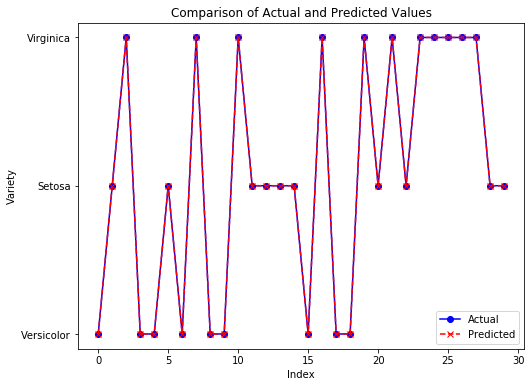

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_test' and 'y_pred' are available from your previous code

# Generating an index range for the plots
x_range = np.arange(len(y_test))

# Plotting the actual and predicted values against the index
plt.figure(figsize=(8, 6))
plt.xlabel('Index')
plt.ylabel('Variety')
plt.title('Comparison of Actual and Predicted Values')

plt.plot(x_range, y_test, marker='o', linestyle='-', color='b', label='Actual')  # Plotting actual values
plt.plot(x_range, y_pred, marker='x', linestyle='--', color='r', label='Predicted')  # Plotting predicted values

# Adding a legend
plt.legend()

plt.show()


In [37]:
# Importing necessary modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculating precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculating recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculating F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [38]:
# Print the intercept (bias term)
print("Intercept:", logistic_model.intercept_)

# Print the coefficients for each feature
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_model.coef_[0]):
    print(f"{feature}: {coef}")


Intercept: [  9.03192453   1.84079368 -10.87271821]
Coefficients:
sepal.length: -0.3970326974458469
sepal.width: 0.9606840053549628
petal.length: -2.3741459943449854
petal.width: -1.0030002805691707


In [39]:
from sklearn.metrics import log_loss

# Assuming 'logistic_model' is the trained Logistic Regression model from your previous code
# Assuming 'X' and 'y' are the feature and target variables

# Make predictions on the training data
y_pred_train = logistic_model.predict(X)

# Calculate log loss (cross-entropy loss) for the model
logloss = log_loss(y, logistic_model.predict_proba(X))
print("Log Loss:", logloss)

# Calculate McFadden's pseudo-R-squared
n = len(y)
pseudo_r2 = 1 - (logloss / (n * (-(1 / n) * logloss)))
print("McFadden's Pseudo-R-squared:", pseudo_r2)


Log Loss: 0.13077263598366598
McFadden's Pseudo-R-squared: 2.0


# Generating Predictions

In [40]:
type(X)


pandas.core.frame.DataFrame

In [41]:
X.iloc[0:1,:]


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2


In [42]:
my_dt_model.predict(X.iloc[0:1,:])


array([0])

In [43]:
def create_df(x1,x2,x3,x4):
    temp_dict = {'sepal.length':[x1], 'sepal.width':[x2], 'petal.length':[x3], 'petal.width':[x4]}
    df_temp = pd.DataFrame(temp_dict)
    return df_temp

In [44]:
le

LabelEncoder()

In [45]:
le.transform(['Setosa'])


array([0], dtype=int64)

In [46]:
le.inverse_transform([0])


array(['Setosa'], dtype=object)

In [47]:
le.inverse_transform([1])


array(['Versicolor'], dtype=object)

In [48]:
le.inverse_transform([2])


array(['Virginica'], dtype=object)

In [49]:
dump(le, 'labelEncoder.joblib')


['labelEncoder.joblib']

In [50]:
le= load('labelEncoder.joblib')

In [51]:
le


LabelEncoder()

In [52]:
from joblib import dump, load

def load_decision_model_predict(model_path, encoder_path, data_points):

    # Loading the model
    my_decision_model = load(model_path) 
    
    #Loading my encoder
    le=load(encoder_path)

    # Creating a DataFrame 
    temp_dict = {'sepal.length':data_points[0], 'sepal.width':data_points[1], 'petal.length':data_points[2], 'petal.width':data_points[3]}
    df_temp = pd.DataFrame(temp_dict)

    # Predicting on my_data
    predictions = my_decision_model.predict(df_temp)
          
    labels= [le.inverse_transform([i])[0] for i in predictions]

    return labels

In [57]:
#The given function should return the predicted class or outcome based on the input features.
#The specific format of the output would depend on how the function is implemented.

In [53]:
load_decision_model_predict('my_decision_tree_model.joblib', 'labelEncoder.joblib', [[5.1],[3.5],[1.4],[0.2]])


['Setosa']